# Sod's shock tube

Soit un tube rempli par un gaz, allant de $x=-10m$ à $x=10m$ dont la partie gauche et droite sont séparés par une menbrane placé en $0$. Les pressions et densités ne sont pas les mêmes dans les deux parties. Quand la membrane est brisée , une onde de choc se propage dans le tube.

In [53]:
import numpy                       
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Paramètres:

In [54]:
nx=81         # Nombre de points dans l'espace discrétisé pour aller de!ç -10m à 10m
dx=0.25       # m Distance entre deux points de l'espace discrétisé 
dt=.0002      # s Écart temporel entre deux points du temps discrétisé
T=.01         # s Temps total d'observation du phénomène
nt=int(T/dt)  # Il faudra en tout (T/dt)=50 pas de 0.0002 s pour en arriver à 0,01 s
gamma=1.4     # Indice adiabatique de l'air

In [55]:
x=numpy.linspace(-10,10,2*nx-1)

Creations des vecteurs ICL-ICR, f et u:

In [56]:
I=numpy.zeros((3,2*nx-1))   #vecteurs "conitions initiales"
U=numpy.zeros((3,2*nx-1))  #Crée le vecteur u
F=numpy.zeros((3,2*nx-1))   #  Crée le vecteur f

Conditions initiales:

In [57]:
for i in range(3):
    if i==0:    #Les densitée.
        l=1.    #gauche
        m=.125   #droite
    elif i==1:   #Les vitesses.
        l=0.   #gauche
        m=0.   #droite
    else:   ## Les pressions.   Les pressions sont directement implémentées dans les unités du SI (N/m²)
        l=100000.    #gauche
        m=10000.     #doite
    for j in range(int((2*nx-2)/2)+1):  
        I[i,j]=l
        I[i,int(2*nx-2)-j]=m #int() a été rajouté car les indices doivent être entiers et python considérant
                             #l'expression comme un réel, un message d'erreur apparaîtrait

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 6: ordinal not in range(128)

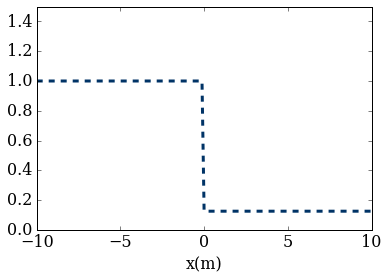

In [58]:
pyplot.plot(x, I[0,], color='#003366', ls='--', lw=3)
pyplot.ylim(0,1.5)
pyplot.xlabel('x(m)', fontsize=16) 
pyplot.ylabel('Densité[kg/m³]', fontsize=16)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc2 in position 5: ordinal not in range(128)

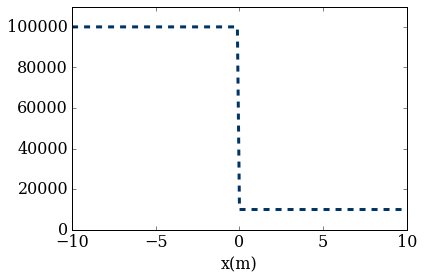

In [59]:
pyplot.plot(x, I[2,], color='#003366', ls='--', lw=3)
pyplot.ylim(0,110000)
pyplot.xlabel('x(m)', fontsize=16)  #x label
pyplot.ylabel('p[N/m²]', fontsize=16)

In [60]:
for i in range(3):
        for j in range(2*nx-1):
            if i==0:
                U[i,j]=I[i,j]
            if i==1:
                U[i,j]=I[i-1,j]*I[i,j]
            if i==2:
                U[i,j]=I[i-2,j]*((I[i,j]/((gamma-1)*I[i-2,j]))+0.5*(I[i-1,j]**2))

In [61]:
for i in range(3):
        for j in range(2*nx-1):
            if i==0:
                F[i,j]=U[i+1,j]
            if i==1:
                F[i,j]=(U[i,j]**2/U[i-1,j])+(gamma-1)*(U[i+1,j]-0.5*(U[i,j]**2/U[i-1,j]))
            if i==2:
                F[i,j]=(U[i,j]+(gamma-1)*(U[i,j]-0.5*(U[i-1,j]**2/U[i-2,j])))*(U[i-1,j]/U[i-2,j])

In [62]:
for n in range(nt): # On applique l'algorithme nt=50 fois pour arriver au temps voulu
    for i in range(3): # Chaque ligne de la matrice doit être changée
        for j in range(0,2*nx-2,2): 
            U[i,j+1]=(0.5*(U[i,j+2]+U[i,j]))-(dt/(2*dx))*(F[i,j+2]-F[i,j])
    
    for i in range(3):    #on crée le vecteur f en chaque point de l'espace à partir du vecteur u pour les indice demi-entier.
        for j in range(0,2*nx-2,2):    
            if i==0:
                F[i,j+1]=U[i+1,j+1]
            if i==1:
                F[i,j+1]=(U[i,j+1]**2/U[i-1,j+1])+(gamma-1)*(U[i+1,j+1]-0.5*(U[i,j+1]**2/U[i-1,j+1]))
            if i==2:
                F[i,j+1]=(U[i,j+1]+(gamma-1)*(U[i,j+1]-0.5*(U[i-1,j+1]**2/U[i-2,j+1])))*(U[i-1,j+1]/U[i-2,j+1])
    
    for i in range(3):  #deuxième partie de l'itération de Richtmyer
        for j in range(2,2*nx-2,2):
            U[i,j]=U[i,j]-(dt/dx)*(F[i,j+1]-F[i,j-1])
        
    for i in range(3):   ##on crée le vecteur f en chaque point de l'espace à partir du vecteur u pour les indice entier
        for j in range(0,2*nx,2):    
            if i==0:
                F[i,j]=U[i+1,j]
            if i==1:
                F[i,j]=(U[i,j]**2/U[i-1,j])+(gamma-1)*(U[i+1,j]-0.5*(U[i,j]**2/U[i-1,j]))
            if i==2:
                F[i,j]=(U[i,j]+(gamma-1)*(U[i,j]-0.5*(U[i-1,j]**2/U[i-2,j])))*(U[i-1,j]/U[i-2,j])

Simulation:

In [63]:
def NT(t): 
    t_2=t+10
    t_3=int(t_2/0.125)
    return t_3

In [76]:
u=U[1,NT(2.5)]/U[0,NT(2.5)]
vitesse=round(u,2)
print("La vitesse en x=2.5m et t=0.01s est de", vitesse ,"m/s")

('La vitesse en x=2.5m et t=0.01s est de', 292.61, 'm/s')


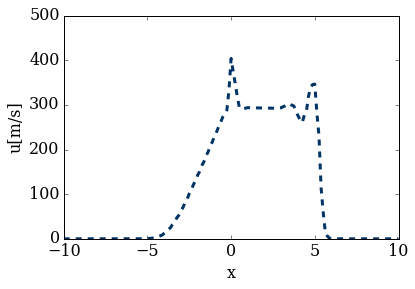

In [77]:
u_2=U[1,]/U[0,]
pyplot.plot(x, u_2, color='#003366', ls='--', lw=3)
pyplot.ylim(0,500)
pyplot.xlabel('x', fontsize=16)  #x label
pyplot.ylabel('u[m/s]', fontsize=16)

In [84]:
p=(F[2,NT(2.5)]/u)-U[2,NT(2.5)]
pression=round(p,2)
print("La pression en x=2.5m et t=0.01s est de", pression , "N/m²")

('La pression en x=2.5m et t=0.01s est de', 30250.89, 'N/m\xc2\xb2')


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc2 in position 5: ordinal not in range(128)

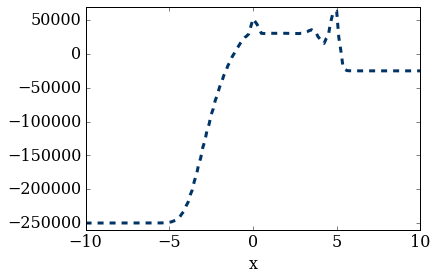

In [67]:
p_2=(F[2,]/u)-U[2,]
pyplot.plot(x, p_2, color='#003366', ls='--', lw=3)
pyplot.ylim(-260000,70000);
pyplot.xlabel('x', fontsize=16)  #x label
pyplot.ylabel('p[N/m²]', fontsize=16)

In [85]:
d=U[0,NT(2.5)]
densite=round(d,2)
print("La densité en x=2.5m et t=0.01s est de", densite, "kg/m³")

('La densit\xc3\xa9 en x=2.5m et t=0.01s est de', 0.37, 'kg/m\xc2\xb3')


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 6: ordinal not in range(128)

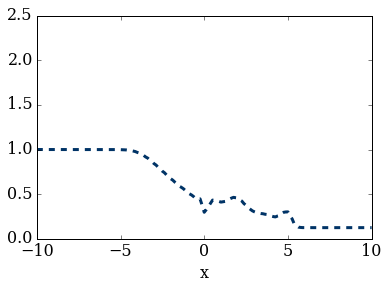

In [86]:
pyplot.plot(x, U[0,], color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);
pyplot.xlabel('x', fontsize=16)  #x label
pyplot.ylabel('densité[kg/m³]', fontsize=16)